In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Creating a new column Family in the dataset by adding SibSp column and Parch column 
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [5]:
# Ticket-->  As it is just a random number,we can skip this column  from our analysis

In [6]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [7]:
# Based on the categories,we will analyze which category people were more likely to survie 
## Low,Mid,Mid_High,High
df['Fare_Category'] = pd.cut(df.Fare,bins=[0, 7.9, 14.45, 31.00, 512],
                             labels = ['Low','Mid','Mid_High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid_High < High]

In [9]:
# Comparing the fare with fare category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid_High
888,23.4500,Mid_High
889,30.0000,Mid_High


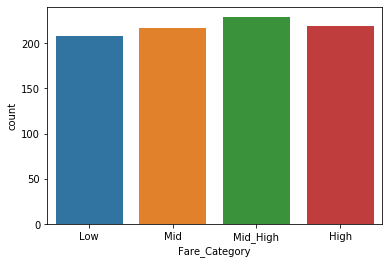

In [10]:
#visualize the Fare category
#countplot give you entire count of a category --> categories of survived and deceased
sns.countplot(x='Fare_Category',data = df)

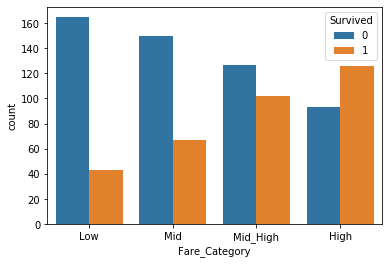

In [12]:
## Visualizing the count of categories based on Survived
sns.countplot(x='Fare_Category',hue='Survived',data=df)

Text(0.5, 1.0, 'Survival based on Fare Category')

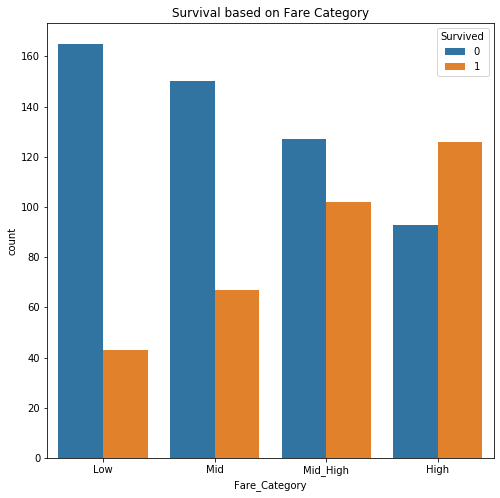

In [13]:
## Visualizing the count of categories based on survived
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data=df).set_title('Survival based on Fare Category')

In [15]:
#Embarked: port-->from which the passengers had boarded the ship
df.Embarked.value_counts() # out of 100% passengers,which port has taken more %

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

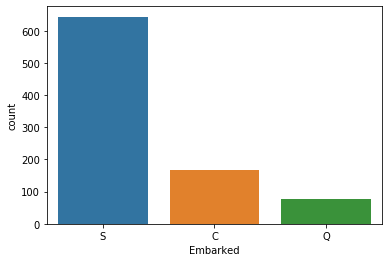

In [17]:
## Visualizing the port column
sns.countplot(x='Embarked',data = df)

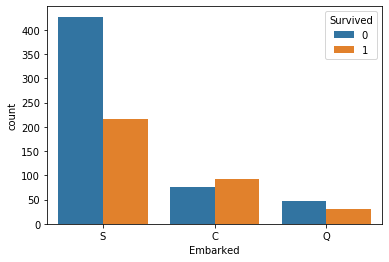

In [18]:
## Visualizing the port column, S-
msns.countplot(x='Embarked',hue='Survived',data = df)

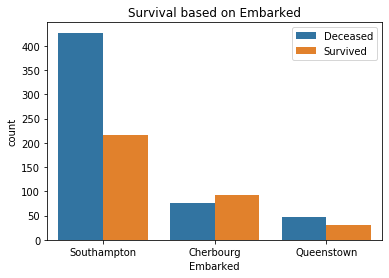

In [19]:
## Visualizing the port column, S-
p = sns.countplot(x='Embarked',hue='Survived',data = df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

In [20]:
## Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [21]:
## Cabin--> 77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [22]:
df.Cabin.isnull().sum()

0

In [23]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [24]:
# Median --> Sorting in the order(middle value) NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(), inplace=True)
df.Age.isnull().sum()

0

In [32]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df.Embarked.mode()

0    S
dtype: object

In [25]:
## Imputing the Embarked column--> mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [26]:
## Imputing the fare category column
df.Fare_Category.isnull().sum()

18

In [28]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

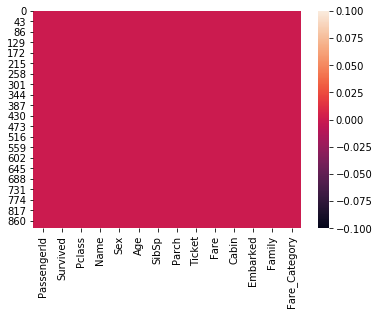

In [34]:
sns.heatmap(df.isnull())

In [35]:
df['Age_Range'] = pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age_Range']].head()

,Age,Age_Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [39]:
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True)

In [40]:
df = pd.concat([df,dummy_set],axis=1)

In [43]:
# Encoding of categorical variables/columns
df = pd.concat([df, pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
                 pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                pd.get_dummies(df['Age_Range'], drop_first=True)],axis=1 )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid_High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [ ]:
LabelEncoder----> 0,1,2,3,4......(how many categories are present inth colimns,that many number we will get)
OneHotEncoder---> it will create dummy column for each and every category

In [49]:
# Encoding the sex column with labelEncoder
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid_High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0


In [51]:
#Dropping the unnecessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin'],axis=1,inplace=True)
df.shape

(891, 165)

In [52]:
df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Family          int64
Age_Range    category
               ...   
(10, 20]        uint8
(20, 30]        uint8
(30, 40]        uint8
(40, 60]        uint8
(60, 80]        uint8
Length: 165, dtype: object

In [ ]:
## StandardScaler-- not required for this(DistanceBased Algorithms)

In [53]:
#Seperating the input and output data,dropping the survived column from the data
X = df.drop('Survived',axis=1)
X.shape

(891, 164)

In [54]:
#output column
y = df.iloc[:,0] 
y.shape

(891,)

In [ ]:
## Input and Output into training data and testing data
#Training--> we will be training data and testing data 
#Testing--> chech the performance of the model
#891-->out of 891,75% of 891 rows will be in trainng dataset and 25% of rows will be in testing data

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1) # random_state = to select the constant rows

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 164)
(223, 164)
(668,)
(223,)


In [64]:
X_train

,Pclass,Sex,Family,Age_Range,Mid,Mid_High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid_High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,"(40, 60]",0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,"(20, 30]",0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,"(40, 60]",0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,"(10, 20]",0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,"(10, 20]",0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,0,"(10, 20]",0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
767,3,0,0,"(30, 40]",0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
72,2,1,0,"(20, 30]",0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
235,3,0,0,"(20, 30]",0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
